In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('track.csv', parse_dates=['time'])
df.dtypes

time      datetime64[ns, UTC]
lat                   float64
lng                   float64
height                float64
dtype: object

In [3]:
df.sample(10).sort_index()

,time,lat,lng,height
18,2015-08-20 03:48:54.662000+00:00,32.519187,35.014365,122.599998
23,2015-08-20 03:49:07.742000+00:00,32.518916,35.014340,123.099998
237,2015-08-20 03:59:22.869000+00:00,32.510184,35.011083,100.599998
316,2015-08-20 04:03:01.834000+00:00,32.508154,35.014292,79.800003
373,2015-08-20 04:05:18.810000+00:00,32.508727,35.017679,84.300003
454,2015-08-20 04:08:36.758000+00:00,32.509996,35.021516,91.099998
461,2015-08-20 04:08:59.841000+00:00,32.510334,35.021376,97.900002
623,2015-08-20 04:16:15.900000+00:00,32.512992,35.016803,101.500000
629,2015-08-20 04:16:31.960000+00:00,32.513221,35.017020,106.599998
650,2015-08-20 04:17:20.855000+00:00,32.513897,35.017175,113.900002


In [4]:
time = df['time'].diff()
time.head()

0                      NaT
1   0 days 00:00:17.499000
2   0 days 00:00:00.926000
3   0 days 00:00:01.159000
4   0 days 00:00:01.009000
Name: time, dtype: timedelta64[ns]

In [5]:
import numpy as np

lat_km = 92
lng_km = 111

def distance(lat1, lng1, lat2, lng2):
    delta_lat = (lat1 - lat2) * lat_km
    delta_lng = (lng1 - lng2) * lng_km
    return np.hypot(delta_lat, delta_lng)

In [6]:
dist_km = distance(
    df['lat'], df['lng'],
    df['lat'].shift(), df['lng'].shift(),
)
dist_km.head()

0         NaN
1    0.007684
2    0.009230
3    0.006492
4    0.006225
dtype: float64

In [7]:
dist_km.sum()

4.693669332948701

In [8]:
time_hours = time / pd.Timedelta(hours=1)
speed_kmh = dist_km / time_hours

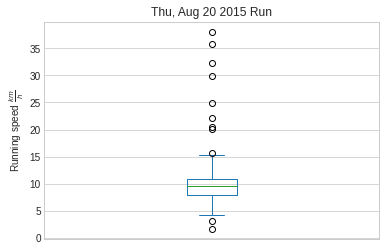

In [9]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

date = df['time'][0].strftime('%a, %b %d %Y')
ax = speed_kmh.plot.box(title=f'{date} Run')
ax.set_xticks([])  # Remove "None"
ax.set_ylabel(r'Running speed $\frac{km}{h}$');